Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
# Importing the required libraries from python

In [2]:
# Mounting the google drie in google collab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/gdrive/Othercomputers/My Laptop (1)/Python_upg/Course 5 - DL/Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path('/content/gdrive/Othercomputers/My Laptop (1)/Python_upg/Course 5 - DL/Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(f'The train image count is {image_count_train}')
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(f'The test image count is {image_count_test}')
# Printing the number of images in train and test data 

The train image count is 2239
The test image count is 118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180
# Declaring the batch size and image height,width

Use 80% of the images for training, and 20% for validation.

In [6]:
# declaring the train data set and giving the required data such as batch size , img height and width etc
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
# declaring the train data set and giving the required data such as batch size , img height and width etc but here subset will be validation
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# printing all the existing classes in the data set
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

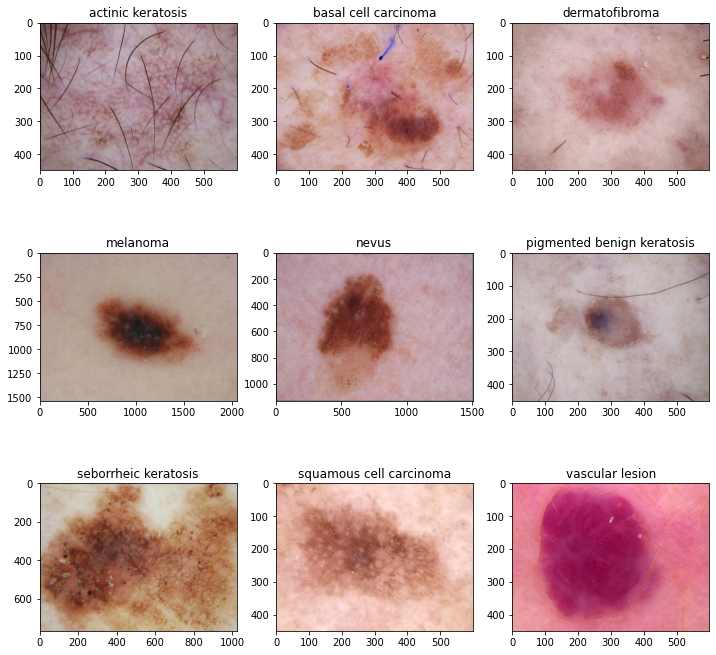

In [9]:
# by using matplotlib we are printing each instance of nine classes like this
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [10]:
# importing various layers from keras
# creating a CNN with c=4 convolution laay for initial analysis
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [11]:
# choosing an appropirate optimiser and loss function for compilation
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

### Train the model

In [13]:
# training the model with 30 apochs 
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 251s 4s/step - loss: 2.0074 - accuracy: 0.2238 - val_loss: 1.7856 - val_accuracy: 0.3512
Epoch 2/30
56/56 [==============================] - 16s 250ms/step - loss: 1.7795 - accuracy: 0.3560 - val_loss: 1.6691 - val_accuracy: 0.3691
Epoch 3/30
56/56 [==============================] - 17s 272ms/step - loss: 1.6459 - accuracy: 0.3912 - val_loss: 1.5855 - val_accuracy: 0.4273
Epoch 4/30
56/56 [==============================] - 15s 246ms/step - loss: 1.5777 - accuracy: 0.4330 - val_loss: 1.5509 - val_accuracy: 0.4362
Epoch 5/30
56/56 [==============================] - 15s 247ms/step - loss: 1.5093 - accuracy: 0.4872 - val_loss: 1.4504 - val_accuracy: 0.5034
Epoch 6/30
56/56 [==============================] - 15s 246ms/step - loss: 1.4122 - accuracy: 0.5173 - val_loss: 1.3733 - val_accuracy: 0.5369
Epoch 7/30
56/56 [==============================] - 15s 244ms/step - loss: 1.3824 - accuracy: 0.5078 - val_loss: 1.4240 - val_accuracy: 0.5034
Epoch 8/30
5

### Visualizing training results

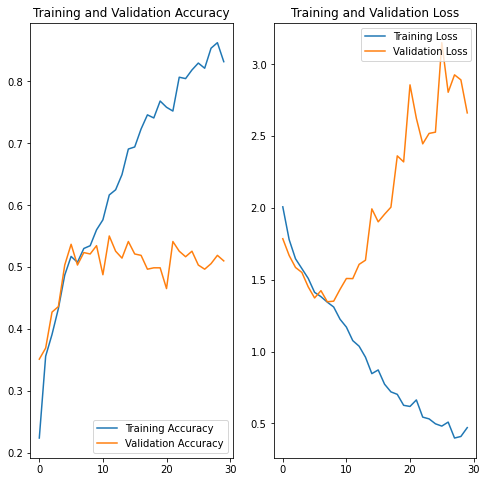

In [14]:
# Plotting the graphs to see whether it is over or under fitting
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

*   As we can see the difference starts around after 9th epoch both in training and validation data set
*   I think the model is overfitting 
*   the accuracy is in between 80% - 83%



In [15]:
# choosing an appropriate data augumentation strategy for the presence of underfit or overfit. 
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

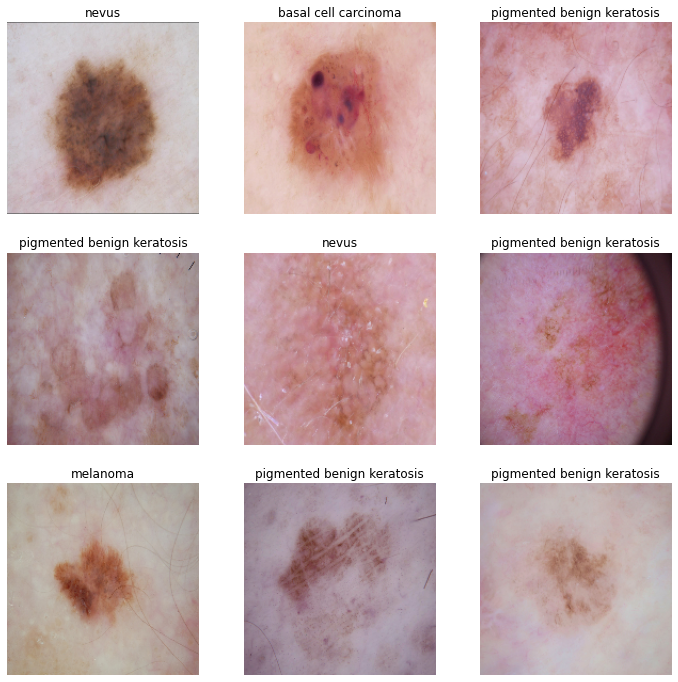

In [16]:
# visualizing how our augmentation strategy works for one instance of training image.
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [17]:
# creating a model to detect whether it overcame the drawbacks we had
num_classes = 9
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))



### Compiling the model

In [18]:
# compiling the model using adam optimizer
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [19]:
## Your code goes here, note: train your model for 20 epochs
# as said above we are training only for 20 apochs
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 17s 249ms/step - loss: 1.9814 - accuracy: 0.2701 - val_loss: 1.6908 - val_accuracy: 0.3848
Epoch 2/20
56/56 [==============================] - 15s 248ms/step - loss: 1.6962 - accuracy: 0.3789 - val_loss: 1.6157 - val_accuracy: 0.4139
Epoch 3/20
56/56 [==============================] - 16s 248ms/step - loss: 1.6132 - accuracy: 0.4191 - val_loss: 1.5456 - val_accuracy: 0.4430
Epoch 4/20
56/56 [==============================] - 15s 244ms/step - loss: 1.5685 - accuracy: 0.4375 - val_loss: 1.6131 - val_accuracy: 0.4228
Epoch 5/20
56/56 [==============================] - 16s 250ms/step - loss: 1.5357 - accuracy: 0.4509 - val_loss: 1.5018 - val_accuracy: 0.4541
Epoch 6/20
56/56 [==============================] - 16s 248ms/step - loss: 1.5197 - accuracy: 0.4743 - val_loss: 1.5077 - val_accuracy: 0.4653
Epoch 7/20
56/56 [==============================] - 16s 248ms/step - loss: 1.5178 - accuracy: 0.4548 - val_loss: 1.4411 - val_accuracy: 0.4899
Epoch 8/20

### Visualizing the results

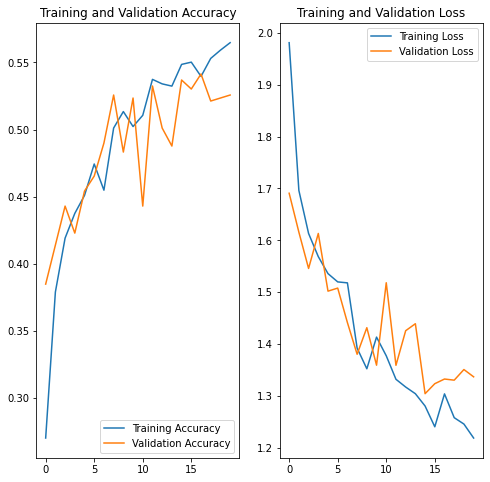

In [20]:
# visualizing the train and validation data set
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

*  No improvement in accuracy but we can see that the overfitting problem has solved due to data augmentation.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [21]:
## Your code goes here.
path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/Othercomputers/My Laptop (1)/P...,actinic keratosis
1,/content/gdrive/Othercomputers/My Laptop (1)/P...,actinic keratosis
2,/content/gdrive/Othercomputers/My Laptop (1)/P...,actinic keratosis
3,/content/gdrive/Othercomputers/My Laptop (1)/P...,actinic keratosis
4,/content/gdrive/Othercomputers/My Laptop (1)/P...,actinic keratosis
...,...,...
2234,/content/gdrive/Othercomputers/My Laptop (1)/P...,vascular lesion
2235,/content/gdrive/Othercomputers/My Laptop (1)/P...,vascular lesion
2236,/content/gdrive/Othercomputers/My Laptop (1)/P...,vascular lesion
2237,/content/gdrive/Othercomputers/My Laptop (1)/P...,vascular lesion


In [22]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/Othercomputers/My Laptop (1)/P...,actinic keratosis
1,/content/gdrive/Othercomputers/My Laptop (1)/P...,actinic keratosis
2,/content/gdrive/Othercomputers/My Laptop (1)/P...,actinic keratosis
3,/content/gdrive/Othercomputers/My Laptop (1)/P...,actinic keratosis
4,/content/gdrive/Othercomputers/My Laptop (1)/P...,actinic keratosis
...,...,...
2234,/content/gdrive/Othercomputers/My Laptop (1)/P...,vascular lesion
2235,/content/gdrive/Othercomputers/My Laptop (1)/P...,vascular lesion
2236,/content/gdrive/Othercomputers/My Laptop (1)/P...,vascular lesion
2237,/content/gdrive/Othercomputers/My Laptop (1)/P...,vascular lesion


<BarContainer object of 9 artists>

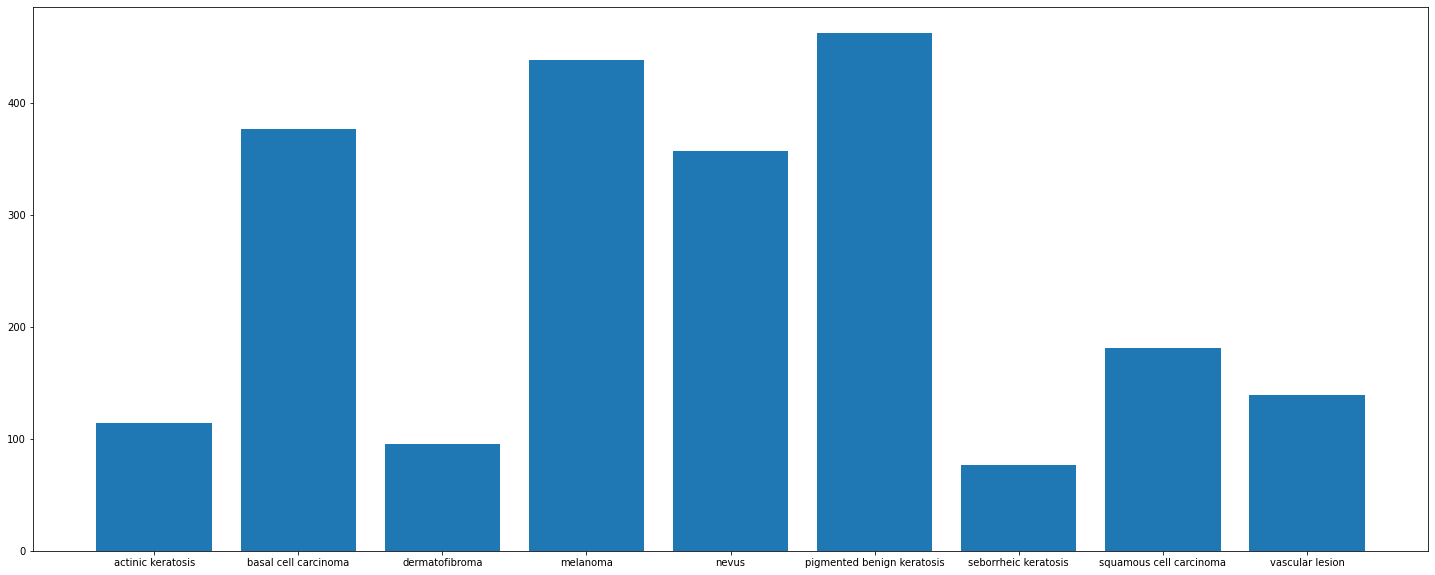

In [23]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#### **Todo:** Write your findings here: 
### - Which class has the least number of samples?
*  seborrheic keratosis has the least number of samples
### - Which classes dominate the data in terms proportionate number of samples?
*  Pigmented bengin keratosis and melanoma dominate the data in terms proportionate number of samples


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [24]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [25]:
# creating a pipeline and adding more number of samples 
path_to_training_dataset="/content/gdrive/Othercomputers/My Laptop (1)/Python_upg/Course 5 - DL/Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/Othercomputers/My Laptop (1)/Python_upg/Course 5 - DL/Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5515B57990>: 100%|██████████| 500/500 [00:22<00:00, 21.81 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/Othercomputers/My Laptop (1)/Python_upg/Course 5 - DL/Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F551547A590>: 100%|██████████| 500/500 [00:20<00:00, 24.01 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/Othercomputers/My Laptop (1)/Python_upg/Course 5 - DL/Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F5513546310>: 100%|██████████| 500/500 [00:20<00:00, 24.79 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/Othercomputers/My Laptop (1)/Python_upg/Course 5 - DL/Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=824x719 at 0x7F55134F97D0>: 100%|██████████| 500/500 [01:37<00:00,  5.13 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/Othercomputers/My Laptop (1)/Python_upg/Course 5 - DL/Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7F55135A0150>: 100%|██████████| 500/500 [01:35<00:00,  5.23 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/Othercomputers/My Laptop (1)/Python_upg/Course 5 - DL/Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5513552110>: 100%|██████████| 500/500 [00:19<00:00, 26.24 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/Othercomputers/My Laptop (1)/Python_upg/Course 5 - DL/Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F5515470F90>: 100%|██████████| 500/500 [00:44<00:00, 11.14 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/Othercomputers/My Laptop (1)/Python_upg/Course 5 - DL/Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5515474D50>: 100%|██████████| 500/500 [00:18<00:00, 27.46 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/Othercomputers/My Laptop (1)/Python_upg/Course 5 - DL/Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5513491510>: 100%|██████████| 500/500 [00:18<00:00, 27.25 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [26]:
# printing the no of images after augmentation
data_dir_train_new = pathlib.Path("/content/gdrive/Othercomputers/My Laptop (1)/Python_upg/Course 5 - DL/Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
image_count_train = len(list(data_dir_train_new.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [28]:
# distribution of augmented data set
for i in class_names:
      for j in data_dir_train_new.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,/content/gdrive/Othercomputers/My Laptop (1)/P...,actinic keratosis
1,/content/gdrive/Othercomputers/My Laptop (1)/P...,actinic keratosis
2,/content/gdrive/Othercomputers/My Laptop (1)/P...,actinic keratosis
3,/content/gdrive/Othercomputers/My Laptop (1)/P...,actinic keratosis
4,/content/gdrive/Othercomputers/My Laptop (1)/P...,actinic keratosis
...,...,...
2234,/content/gdrive/Othercomputers/My Laptop (1)/P...,vascular lesion
2235,/content/gdrive/Othercomputers/My Laptop (1)/P...,vascular lesion
2236,/content/gdrive/Othercomputers/My Laptop (1)/P...,vascular lesion
2237,/content/gdrive/Othercomputers/My Laptop (1)/P...,vascular lesion


In [29]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/Othercomputers/My Laptop (1)/Python_upg/Course 5 - DL/Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0032206.jpg_3cfddd35-baad-48c3-99d4-e0038b0485c5.jpg',
 '/content/gdrive/Othercomputers/My Laptop (1)/Python_upg/Course 5 - DL/Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026171.jpg_a4287948-4a7a-441f-a349-f5a78896e3e3.jpg',
 '/content/gdrive/Othercomputers/My Laptop (1)/Python_upg/Course 5 - DL/Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028393.jpg_54b44150-ef1f-4e7d-a61c-eb51d8136df9.jpg',
 '/content/gdrive/Othercomputers/My Laptop (1)/Python_upg/Course 5 - DL/Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/

In [30]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [31]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [32]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [33]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [34]:
batch_size = 32
img_height = 180
img_width = 180

In [35]:
data_dir_train_1 = pathlib.Path("/content/gdrive/Othercomputers/My Laptop (1)/Python_upg/Course 5 - DL/Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")

#### **Todo:** Create a training dataset

In [36]:

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [37]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [38]:
## your code goes here
from tensorflow.keras.layers import Dense, BatchNormalization
num_classes = 9
model = Sequential([ 
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(num_classes, activation="softmax"))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [39]:
# compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [40]:
epochs =50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 32s 183ms/step - loss: 1.8707 - accuracy: 0.2852 - val_loss: 1.4578 - val_accuracy: 0.4432
Epoch 2/50
169/169 [==============================] - 34s 193ms/step - loss: 1.4449 - accuracy: 0.4598 - val_loss: 1.4463 - val_accuracy: 0.4647
Epoch 3/50
169/169 [==============================] - 32s 187ms/step - loss: 1.2605 - accuracy: 0.5267 - val_loss: 1.2946 - val_accuracy: 0.5152
Epoch 4/50
169/169 [==============================] - 32s 182ms/step - loss: 1.0839 - accuracy: 0.5972 - val_loss: 1.1388 - val_accuracy: 0.5761
Epoch 5/50
169/169 [==============================] - 32s 181ms/step - loss: 0.9521 - accuracy: 0.6521 - val_loss: 1.0109 - val_accuracy: 0.6451
Epoch 6/50
169/169 [==============================] - 31s 180ms/step - loss: 0.7856 - accuracy: 0.7127 - val_loss: 0.8954 - val_accuracy: 0.6860
Epoch 7/50
169/169 [==============================] - 31s 180ms/step - loss: 0.7343 - accuracy: 0.7337 - val_loss: 0.9812 - val_accuracy: 0.6

#### **Todo:**  Visualize the model results

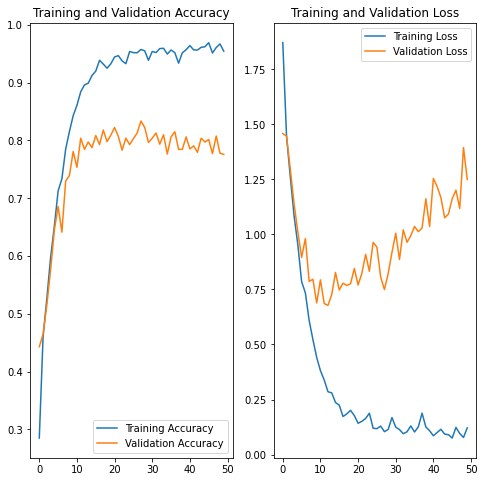

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



### FINAL ANALYSIS

* This final model still seems to be overfitting
* This problem of overfitting can be solved by various methods such as adding neuron layers, adding drop outs etc
* The Accuracy on training data has increased a lot
* We can use hyper parameter tuning to still better this model.